|평가문항|상세기준|
|:-|:-|
|1. Baseline을 참고하여 진행하였는가?|EDA(탐색적 데이터 분석), 데이터 전처리, 검증 데이터 분리 과정을 수행 하였는가?|
|2. 머신러닝 지도학습(회귀) 모델을 잘 사용하였는가?|지도학습 회귀 모델을 3가지 이상 사용하여 MSE 결과를 확인해 보았는가?|
|3. Baseline score(MSE 51,xxx) 보다 좋은 성능 향상을 하였는가?|Baseline score(MSE 51,xxx) 보다 좋은 성능을 보여준 회귀 모델은 무엇이며, MSE score는 몇 점인가?|

# Airbnb(New York City)
- 미국 NYC Airbnb 목록(2019)
- 프로젝트 목적: 가격 예측(price)
- 제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)
- 평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)
- [데이터 출처](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)

In [1]:
# conda install tensorflow

In [2]:
# 라이브러리 호출
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set(font_scale = 1.2)
sns.set_palette("Set2")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\pc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

# 데이터 살펴보기

## 1. train data

In [4]:
train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0


In [5]:
train.shape

(39116, 16)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

## 2. test_data

In [7]:
test.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,2019-03-24,0.65,4,365
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,2018-05-11,0.13,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,2019-06-23,4.31,3,246


In [8]:
test.shape

(9779, 15)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   name                            9775 non-null   object 
 2   host_id                         9779 non-null   int64  
 3   host_name                       9775 non-null   object 
 4   neighbourhood_group             9779 non-null   object 
 5   neighbourhood                   9779 non-null   object 
 6   latitude                        9779 non-null   float64
 7   longitude                       9779 non-null   float64
 8   room_type                       9779 non-null   object 
 9   minimum_nights                  9779 non-null   int64  
 10  number_of_reviews               9779 non-null   int64  
 11  last_review                     7721 non-null   object 
 12  reviews_per_month               77

target인 price 컬럼을 제외하고 train과 test는 같은 종류의 컬럼을 포함한다.

# 결측치 확인 및 처리

In [10]:
# train 데이터에서 결측치 개수
train.isna().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [11]:
# train 데이터에서 결측치 백분율
train.isna().mean() * 100

id                                 0.000000
name                               0.030678
host_id                            0.000000
host_name                          0.043460
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.436650
reviews_per_month                 20.436650
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [12]:
# test 데이터에서 결측치 개수
test.isna().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [13]:
# test 데이터에서 결측치 백분율
test.isna().mean() *100

id                                 0.000000
name                               0.040904
host_id                            0.000000
host_name                          0.040904
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       21.045097
reviews_per_month                 21.045097
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

결측치 비율이 매우 낮은 name, host_name 컬럼의 결측치는 삭제한다.

In [14]:
train = train.dropna(subset = ['name'])
train = train.dropna(subset = ['host_name'])
test = test.dropna(subset = ['name'])
test = test.dropna(subset = ['host_name'])

In [15]:
train.isna().mean() * 100

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.426229
reviews_per_month                 20.426229
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [16]:
train.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7984
reviews_per_month                 7984
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [17]:
test.isna().mean() * 100

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       21.011155
reviews_per_month                 21.011155
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [18]:
test.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2053
reviews_per_month                 2053
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [19]:
# last_review와 reviews_per_month의 결측치를 포함하는 행이 동일한 행인지 확인
missing_last_review = train[train['last_review'].isna()]
missing_reviews_per_month = train[train['reviews_per_month'].isna()]

np.sum(missing_last_review['id'] == missing_reviews_per_month['id'])

7984

In [20]:
missing_last_review = test[test['last_review'].isna()]
missing_reviews_per_month = test[test['reviews_per_month'].isna()]

np.sum(missing_last_review['id'] == missing_reviews_per_month['id'])

2053

같은 행의 last_review 정보와 reviews_per_month가 누락되어 있다. 즉, 아직 리뷰를 받지 못한 숙소일 가능성이 있다.  
따라서 last_review는 'unknown', reviews_per_month는 0으로 대체한다.

In [21]:
train['last_review'] = train['last_review'].fillna('unknown')
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)

test['last_review'] = test['last_review'].fillna('unknown')
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [22]:
train.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [23]:
test.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

train, test 데이터 모두에서 결측치를 제거하고 처리했다.

# 중복값 확인 및 처리

In [24]:
train[train.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [25]:
test[test.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


두 데이터 모두 중복값은 없다.

# 이상치 처리

In [26]:
# train 데이터의 수치형 데이터 기술 통계 확인
train.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.908700e+04,3.908700e+04,39087.000000,39087.000000,39087.000000,39087.000000,39087.000000,39087.000000,39087.000000,39087.000000
mean,1.899121e+07,6.775410e+07,40.728845,-73.952132,152.780055,6.993271,23.273518,1.092346,7.095070,112.997825
std,1.099247e+07,7.882719e+07,0.054495,0.046356,241.832756,20.317091,44.588870,1.600973,32.672859,131.661206
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.415397e+06,7.834318e+06,40.690030,-73.983190,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.965017e+07,3.070761e+07,40.723000,-73.955740,105.000000,2.000000,5.000000,0.370000,1.000000,45.000000
75%,2.914746e+07,1.074344e+08,40.762940,-73.936340,175.000000,5.000000,23.000000,1.590000,2.000000,228.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


minimum_nights의 평균값에 비해 max값이 매우 크다.

Text(0.5, 0, 'Minimum Nights')

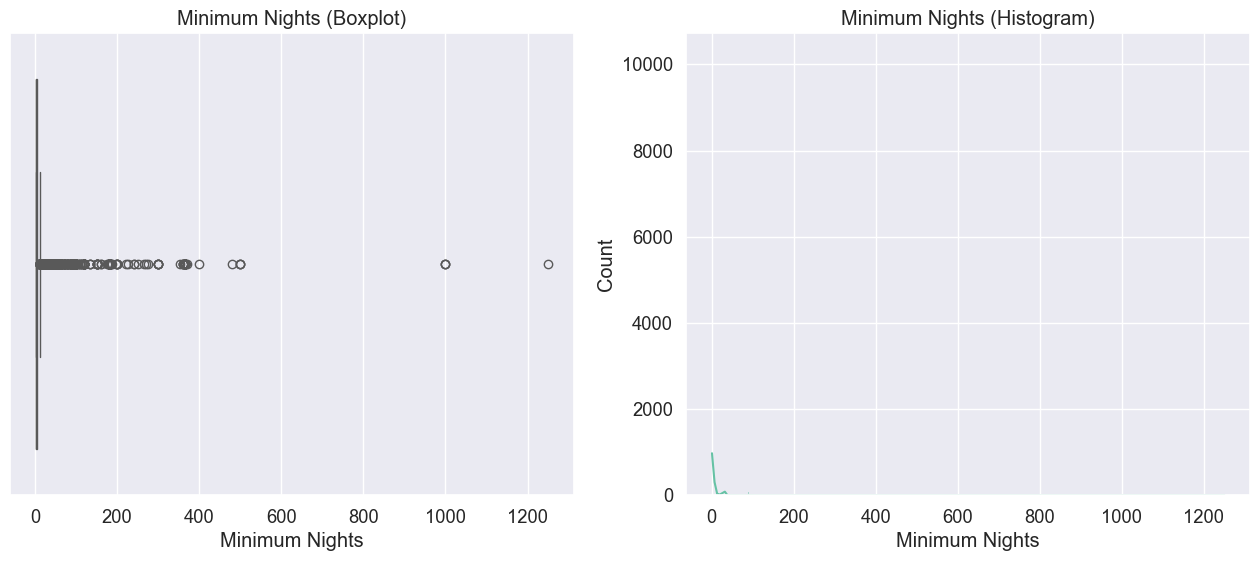

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

sns.boxplot(x = 'minimum_nights', data = train, ax = ax[0])
ax[0].set_title('Minimum Nights (Boxplot)')
ax[0].set_xlabel('Minimum Nights')

sns.histplot(x = 'minimum_nights', data = train, ax = ax[1], kde = True)
ax[1].set_title('Minimum Nights (Histogram)')
ax[1].set_xlabel('Minimum Nights')

이상치의 범위가 너무 커서 그래프가 제대로 그려지지 않는다.

In [28]:
train['minimum_nights'].sort_values(ascending = False).value_counts().head(50)

minimum_nights
1      10211
2       9348
3       6343
30      3015
4       2671
5       2428
7       1643
6        585
14       451
10       390
29       269
15       226
20       172
28       164
31       160
21       108
8        105
60        87
90        82
12        77
9         64
25        61
13        41
180       34
11        26
45        25
18        25
365       23
120       21
35        13
16        13
27        12
26        12
50        11
40        10
17        10
24        10
100        9
22         8
19         7
70         7
80         7
23         6
150        6
300        4
200        4
360        4
32         4
75         4
999        3
Name: count, dtype: int64

(0.0, 100.0)

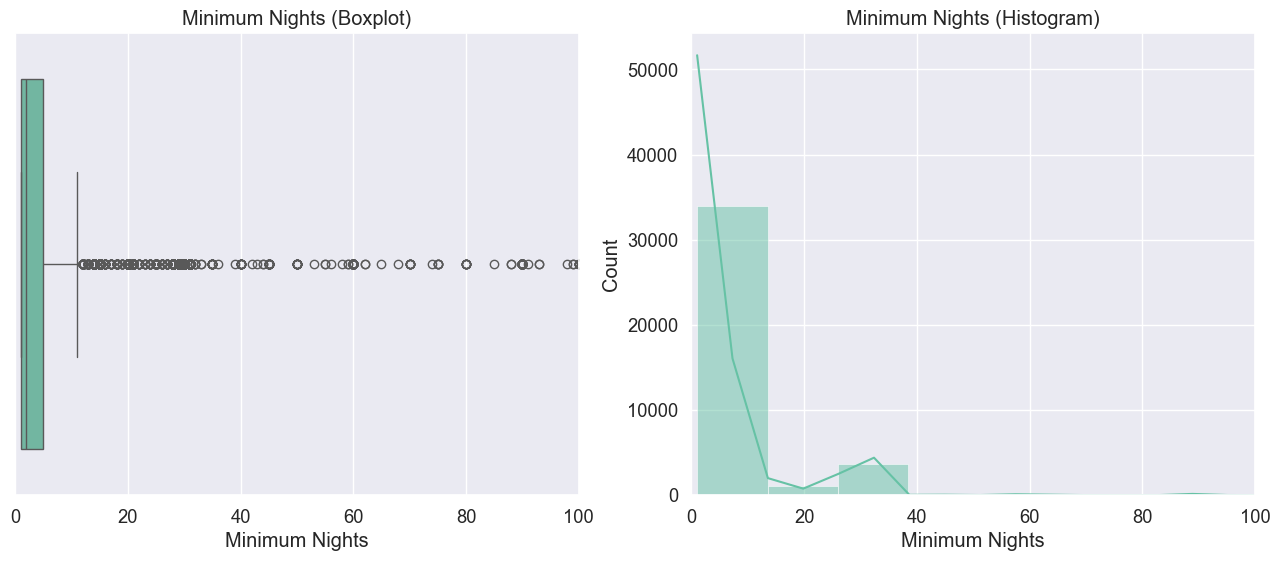

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

sns.boxplot(x = 'minimum_nights', data = train, ax = ax[0])
ax[0].set_title('Minimum Nights (Boxplot)')
ax[0].set_xlabel('Minimum Nights')
ax[0].set_xlim(0, 100)

sns.histplot(x = 'minimum_nights', data = train, bins = 100, ax = ax[1], kde = True)
ax[1].set_title('Minimum Nights (Histogram)')
ax[1].set_xlabel('Minimum Nights')
ax[1].set_xlim(0, 100)

대부분 숙소에서 최소 숙박일수는 0~40일 사이다.

In [30]:
percentile_99 = train['minimum_nights'].quantile(0.99)
percentile_99

44.13999999999942

백분위수 99%를 기준으로 하면 최소숙박일자는 44일이다. 이 이상의 값들은 이상치로 간주하여 제거한다.

In [31]:
# 99% 백분위수를 기준으로 이상치 제거
threshold = train['minimum_nights'].quantile(0.99)
filtered_train = train[train['minimum_nights'] <= threshold]

original_size = train.shape[0]
filtered_size = filtered_train.shape[0]
removed_size = original_size - filtered_size

original_size, filtered_size, removed_size

(39087, 38696, 391)

1%의 데이터가 이상치로 간주되어 삭제되었다.

In [32]:
# test 데이터에도 동일한 작업 수행
filtered_test = test[test['minimum_nights'] <= threshold]

original_test_size = test.shape[0]
filtered_test_size = filtered_test.shape[0]
removed_test_count = original_test_size - filtered_test_size

original_test_size, filtered_test_size, removed_test_count

(9771, 9662, 109)

In [33]:
train = filtered_train
test = filtered_test

# EDA

## 1. Numerical data

In [34]:
numeric = train.select_dtypes(include=['int64', 'float64'])
numeric.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [35]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38696 entries, 0 to 39115
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38696 non-null  int64  
 1   host_id                         38696 non-null  int64  
 2   latitude                        38696 non-null  float64
 3   longitude                       38696 non-null  float64
 4   price                           38696 non-null  int64  
 5   minimum_nights                  38696 non-null  int64  
 6   number_of_reviews               38696 non-null  int64  
 7   reviews_per_month               38696 non-null  float64
 8   calculated_host_listings_count  38696 non-null  int64  
 9   availability_365                38696 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.2 MB


Text(0.5, 1.0, 'Correlation Matrix of Numerical Variables')

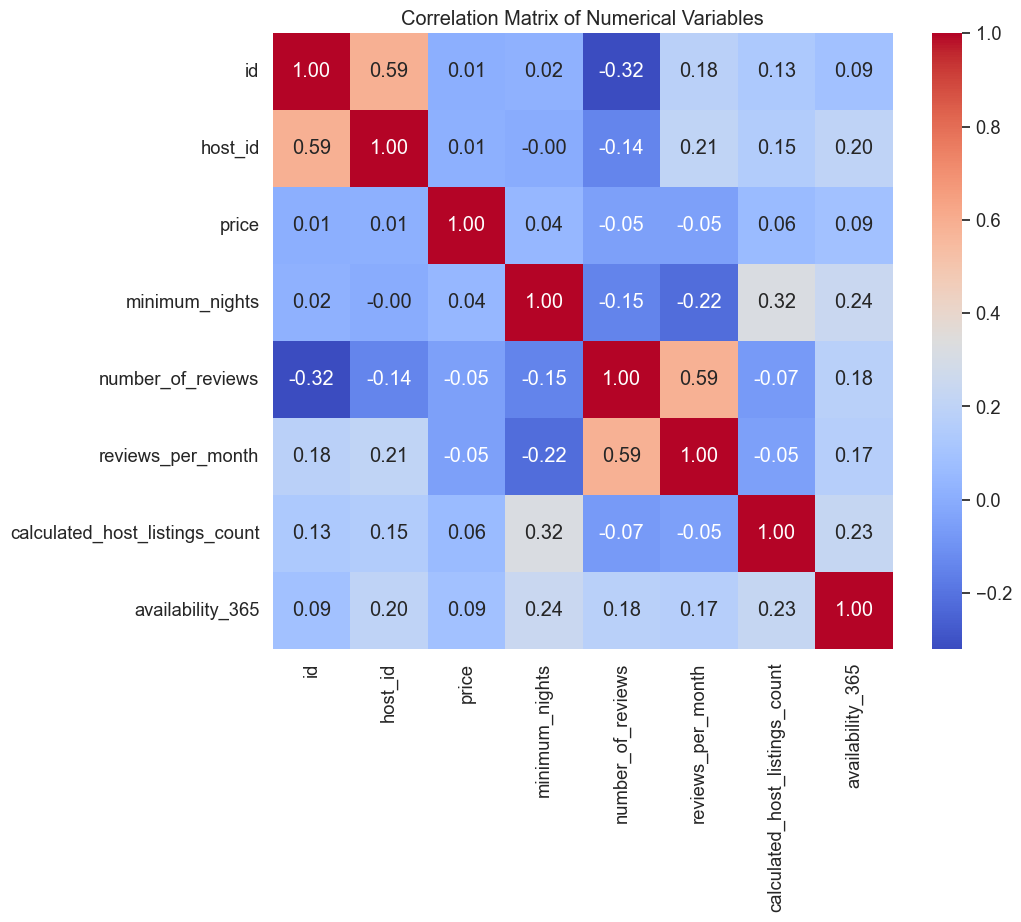

In [36]:
plt.figure(figsize = (10, 8))
sns.heatmap(numeric[['id','host_id', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr(),
           annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix of Numerical Variables')

그나마 reviews_per_month와 number_of_reviews의 관계가 있으나...이 두 개는 상관관계가 있을 수 밖에 없음

## 2. Categorical data

In [37]:
category = train.select_dtypes(include='object')
category.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [38]:
category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38696 entries, 0 to 39115
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 38696 non-null  object
 1   host_name            38696 non-null  object
 2   neighbourhood_group  38696 non-null  object
 3   neighbourhood        38696 non-null  object
 4   room_type            38696 non-null  object
 5   last_review          38696 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


neighbourhood_group, neighbourhodd, room_type 범주형 데이터의 비교에 카이제곱 검정 방법을 사용한다.

In [39]:
from scipy.stats import chi2_contingency

variables_to_test = ['neighbourhood_group', 'neighbourhood', 'room_type']

chi2_test_results = {}

# 각 변수 쌍에 대해 카이제곱 검정 수행
for i in range(len(variables_to_test)):
    for j in range(i+1, len(variables_to_test)):
        cross_tab = pd.crosstab(train[variables_to_test[i]], train[variables_to_test[j]])
        chi2, p, dof, expected = chi2_contingency(cross_tab)
        chi2_test_results[f'{variables_to_test[i]} vs {variables_to_test[j]}'] = {'Chi2 Statistic': chi2, 'p-value': p}

chi2_test_results

{'neighbourhood_group vs neighbourhood': {'Chi2 Statistic': 154784.0,
  'p-value': 0.0},
 'neighbourhood_group vs room_type': {'Chi2 Statistic': 1185.167776167838,
  'p-value': 1.5359819228167766e-250},
 'neighbourhood vs room_type': {'Chi2 Statistic': 5067.640796514898,
  'p-value': 0.0}}

__1. neighbourhood_group vs neighbourhood__
- Chi2 Statistic: 154784.0
- p-value: 0.0  
p-value가 0이므로 neighbourhood_group과 neighbourhood의 연관성이 매우 강함

__2.neighbourhood_group vs room_type__
- Chi2 Statistic: 1185.17
- p-value: 1.54e-250  
p-value가 매우 작으므로 (거의 0임), neighbourhood_group과 room_type의 연관성이 매우 강함

__3. neighbourhood vs room_type__
- Chi2 Statistic: 5067.64
- p-value: 0.0  
p-value가 0이므로 neighbourhood와 room_type의 연관성이 매우 강함.  

→ neighbourhood_group, neighbourhood, room_type 세 변수 모두 서로 강하게 연관되어 있음  
    = 특정 지역 그룹이나 동네에서 특정 유형의 숙소가 더 일반적일 수 있음

In [40]:
train['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        17105
Brooklyn         15927
Queens            4502
Bronx              873
Staten Island      289
Name: count, dtype: int64

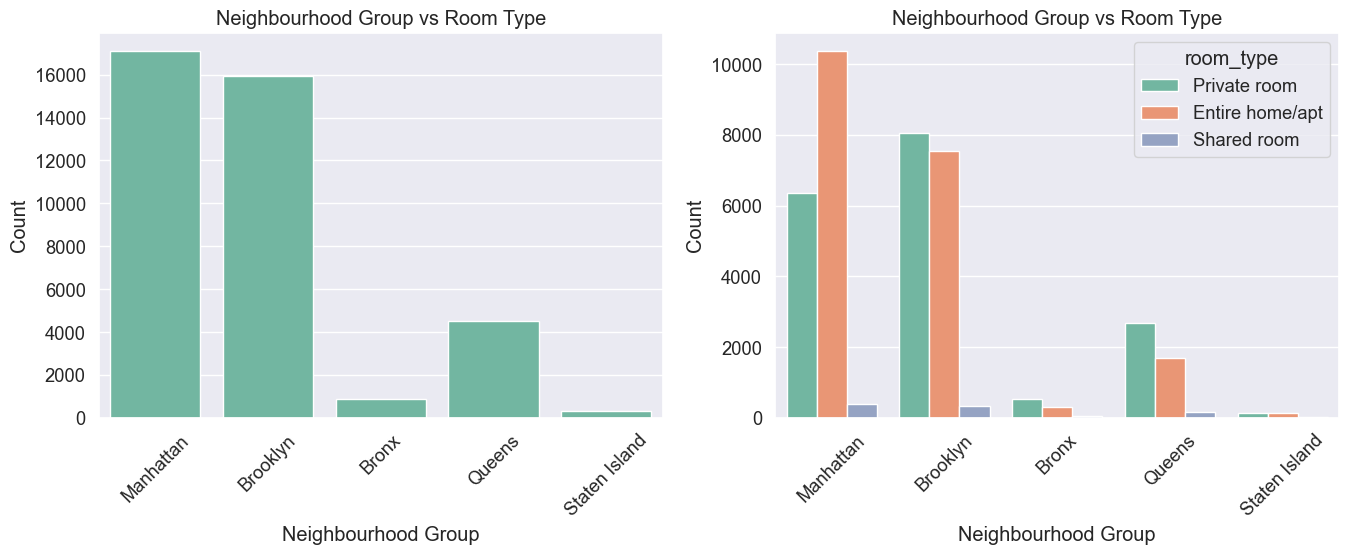

In [41]:
# neighbourhood_group vs room_type

fig, ax = plt.subplots(1, 2, figsize = (16, 5))

sns.countplot(data=train, x='neighbourhood_group', ax = ax[0])
ax[0].set_title('Neighbourhood Group vs Room Type')
ax[0].set_xlabel('Neighbourhood Group')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

sns.countplot(data=train, x='neighbourhood_group', hue='room_type', ax = ax[1])
ax[1].set_title('Neighbourhood Group vs Room Type')
ax[1].set_xlabel('Neighbourhood Group')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)

- 모든 지역에서 'shared room'의 수가 가장 적음.  
    = 대부분의 여행객이 공용 숙소를 선호하지 않음
- 맨해튼을 제외한 모든 지역에서 프라이빗 룸의 수가 더 많음.
- 맨해튼은 유일하게 프라이빗 룸보다 전체 아파트 숙소 수가 더 많음.
    - 맨해튼은 뉴욕 중심부로 고층 아파트와 주거 단지가 밀집해 있어 다른 지역에 비해 아파트 숙소 수가 더 많을 수 있음.

## 3. Entire data

전체 데이터에 대한 분석 실행.

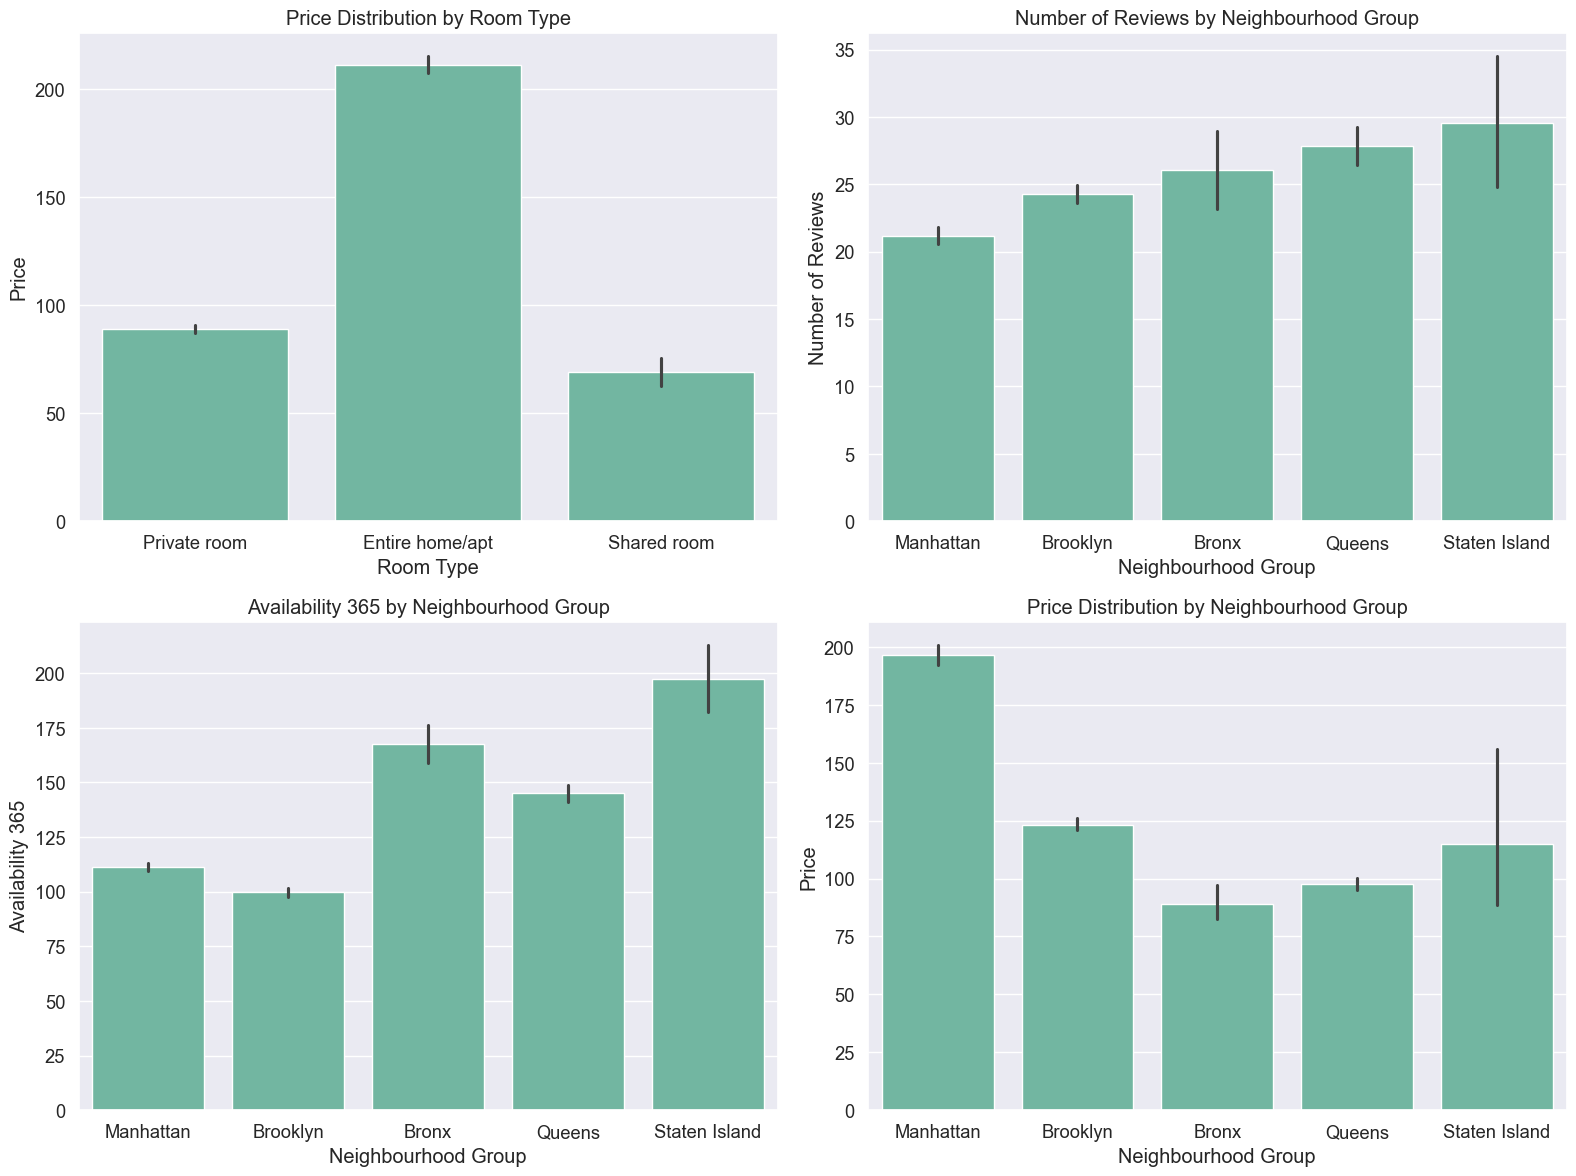

In [42]:
# 2x2 subplot을 사용하여 위의 4개 비교 시각화를 한 번에 표시
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 가격과 숙소 유형에 따른 비교
sns.barplot(data=train, x='room_type', y='price', ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution by Room Type')
axes[0, 0].set_xlabel('Room Type')
axes[0, 0].set_ylabel('Price')

# 리뷰 수와 지역 그룹에 따른 비교
sns.barplot(data=train, x='neighbourhood_group', y='number_of_reviews', ax=axes[0, 1])
axes[0, 1].set_title('Number of Reviews by Neighbourhood Group')
axes[0, 1].set_xlabel('Neighbourhood Group')
axes[0, 1].set_ylabel('Number of Reviews')

# 가용성과 지역 그룹에 따른 비교
sns.barplot(data=train, x='neighbourhood_group', y='availability_365', ax=axes[1, 0])
axes[1, 0].set_title('Availability 365 by Neighbourhood Group')
axes[1, 0].set_xlabel('Neighbourhood Group')
axes[1, 0].set_ylabel('Availability 365')

# 가격과 지역 그룹에 따른 비교
sns.barplot(data=train, x='neighbourhood_group', y='price', ax=axes[1, 1])
axes[1, 1].set_title('Price Distribution by Neighbourhood Group')
axes[1, 1].set_xlabel('Neighbourhood Group')
axes[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()

- 전체 아파트를 빌리는 것이 프라이빗 룸과 공용실을 빌리는 것보다 많은 비용이 사용됨.
- Statne Island의 숙소는 더 자주 빌려지며 (Availability 365), 평균 리뷰 수가 가장 많음.
- 맨해튼의 숙소 가격이 가장 높고 (아파트 숙소 수가 가장 많음), 스태튼 아일랜드 숙소 가격 분산이 가장 큼.

# Data selection

1. id, name, host_id, host_name 등은 모델에 큰 영향을 미치지 않으므로 삭제.
2. neighbourhood 컬럼은 neighboorhood_group과 유사한 정보를 담고 있으면서도 너무 자세한 정보를 담고 있으므로 삭제 (차원의 저주 방지).
3. 리뷰 관련 데이터들은 가격과 상관관계가 낮으므로 삭제.
4. 위도와 경도 없이도 지역으로 가격 유추 가능하므로 삭제.

In [43]:
train.drop([
    'id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude',
    'number_of_reviews', 'last_review', 'reviews_per_month'
    ], axis = 1, inplace = True)

train.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Manhattan,Private room,70,3,2,0
1,Manhattan,Entire home/apt,240,2,2,262
3,Brooklyn,Entire home/apt,85,4,2,1
4,Brooklyn,Private room,44,28,1,0
5,Manhattan,Entire home/apt,135,3,1,0


In [44]:
test.drop([
    'id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude',
    'number_of_reviews', 'last_review', 'reviews_per_month'
    ], axis = 1, inplace = True)

test.head()

,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,3,1,0
1,Manhattan,Entire home/apt,3,1,244
2,Brooklyn,Entire home/apt,1,4,365
3,Brooklyn,Entire home/apt,3,1,0
4,Manhattan,Entire home/apt,1,3,246


In [45]:
train.shape, test.shape

((38696, 6), (9662, 5))

# 머신러닝

In [46]:
# 데이터 분리
from sklearn.model_selection import train_test_split

y = train['price']
X = train.drop(['price'], axis = 1)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 범주형 데이터에 원핫 인코딩 적용
X = pd.get_dummies(X).astype(int)
X

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,3,2,0,0,0,1,0,0,0,1,0
1,2,2,262,0,0,1,0,0,1,0,0
3,4,2,1,0,1,0,0,0,1,0,0
4,28,1,0,0,1,0,0,0,0,1,0
5,3,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
39111,30,2,346,0,0,1,0,0,1,0,0
39112,1,3,342,0,0,0,1,0,0,1,0
39113,7,1,0,0,0,1,0,0,1,0,0
39114,30,1,259,0,0,1,0,0,1,0,0


In [48]:
# 수치형 데이터에 Min-Max scaling 적용
scaler = MinMaxScaler()
num_columns = ['minimum_nights', 'calculated_host_listings_count', 'availability_365']
X[num_columns] = scaler.fit_transform(X[num_columns])
X

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.046512,0.003067,0.000000,0,0,1,0,0,0,1,0
1,0.023256,0.003067,0.717808,0,0,1,0,0,1,0,0
3,0.069767,0.003067,0.002740,0,1,0,0,0,1,0,0
4,0.627907,0.000000,0.000000,0,1,0,0,0,0,1,0
5,0.046512,0.000000,0.000000,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
39111,0.674419,0.003067,0.947945,0,0,1,0,0,1,0,0
39112,0.000000,0.006135,0.936986,0,0,0,1,0,0,1,0
39113,0.139535,0.000000,0.000000,0,0,1,0,0,1,0,0
39114,0.674419,0.000000,0.709589,0,0,1,0,0,1,0,0


Text(0.5, 1.0, 'Correlation Matrix of Variables')

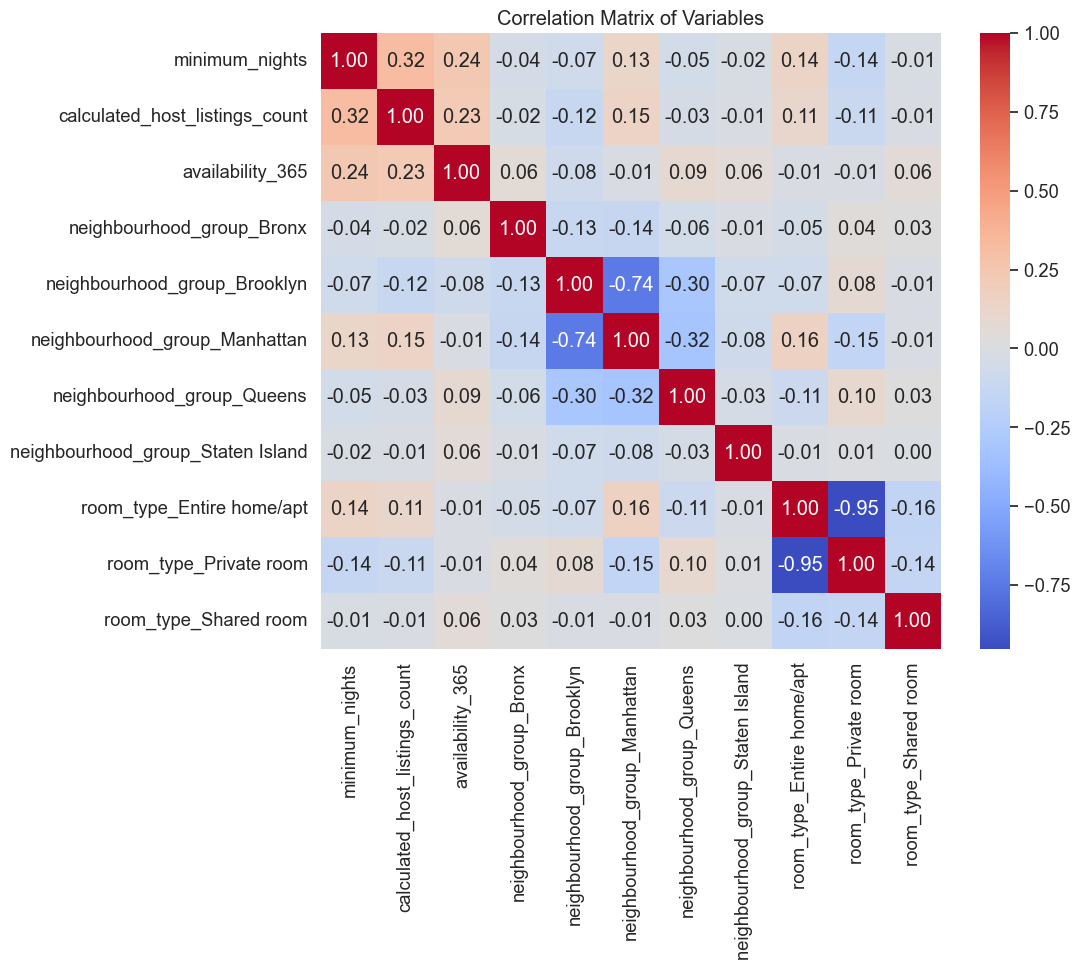

In [49]:
plt.figure(figsize = (10, 8))
sns.heatmap(X.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix of Variables')

In [50]:
#test 데이터에도 동일하게 적용
test = pd.get_dummies(test).astype(int)
test[num_columns] = scaler.fit_transform(test[num_columns])
test

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.051282,0.000000,0.000000,0,1,0,0,0,0,1,0
1,0.051282,0.000000,0.668493,0,0,1,0,0,1,0,0
2,0.000000,0.009202,1.000000,0,1,0,0,0,1,0,0
3,0.051282,0.000000,0.000000,0,1,0,0,0,1,0,0
4,0.000000,0.006135,0.673973,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9774,0.025641,0.000000,0.254795,0,1,0,0,0,1,0,0
9775,0.025641,0.003067,0.824658,0,1,0,0,0,0,1,0
9776,0.000000,0.000000,0.167123,0,0,0,1,0,0,1,0
9777,0.000000,0.000000,0.000000,0,0,1,0,0,0,1,0


In [51]:
# train data, validation data 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30956, 11), (7740, 11), (30956,), (7740,))

## 1. Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 선형회귀 모델 생성 및 학습
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 검증 데이터셋에 대한 예측
lr_pred = lr_model.predict(X_test)

# MSE 계산
lr_mse_value = mean_squared_error(y_test, lr_pred)
print(f"Linear Regression MSE: {lr_mse_value}")

Linear Regression MSE: 33422.01959539382


## 2. Ridge

In [68]:
from sklearn.linear_model import Ridge
r_model = Ridge()
r_model.fit(X_train, y_train)

r_pred = r_model.predict(X_test)

r_mse_value = mean_squared_error(y_test, r_pred)
print(f"Ridge MSE: {r_mse_value}")

Ridge MSE: 33421.908266087135


## 3. Lasso

In [69]:
from sklearn.linear_model import Lasso
ls_model = Lasso()
ls_model.fit(X_train, y_train)

ls_pred = ls_model.predict(X_test)

ls_mse_value = mean_squared_error(y_test, ls_pred)
print(f"Lasso MSE: {ls_mse_value}")

Lasso MSE: 33469.29634778969


## 4. ElasticNet

In [70]:
from sklearn.linear_model import ElasticNet
en_model = ElasticNet()
en_model.fit(X_train, y_train)

en_pred = en_model.predict(X_test)

en_mse_value = mean_squared_error(y_test, en_pred)
print(f"ElasticNet MSE: {en_mse_value}")

ElasticNet MSE: 35010.05015553806


## 5. RandomForest

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mse_value = mean_squared_error(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse_value}")

Random Forest MSE: 47797.67238166299


## 6. XGBoost

In [61]:
XGBRegressor?

In [72]:
from xgboost import XGBRegressor
xg_model = XGBRegressor()
xg_model.fit(X_train, y_train)

xg_pred = xg_model.predict(X_test)

xg_mse_value = mean_squared_error(y_test, xg_pred)
print(f"XGB MSE: {xg_mse_value}")

XGB MSE: 57696.63164330604


In [58]:
# 하이퍼파라미터
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [3, 5, 7, 10, 20],
    'max_leaves': [3, 5, 7, 10, 20],
    'learning_rate': [0.05, 0.1, 0.3, 0.5, 1],
    'subsample': [0.3, 0.5, 0.7, 1, 1.5, 2],
}

from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(xg_model, params, cv = 5, n_iter=10, n_jobs = -1)
grid.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.3, 0.5,
                                                          1],
                                        'max_depth': [3, 5, 7, 10, 20],
                                        'max_leaves': [3, 5, 7, 10, 20],
                                        'n_estimators': [10, 20, 50, 100, 200],
                                        'subsample': [0.3, 0.5, 0.7, 1, 1.5,
                                                      2]})

In [59]:
grid.best_params_

{'subsample': 0.7,
 'n_estimators': 200,
 'max_leaves': 7,
 'max_depth': 10,
 'learning_rate': 0.05}

In [73]:
xgb = XGBRegressor(
    n_estimators = 50,
    max_depth = 3,
    max_leaves = 3,
    learning_rate = 1,
    subsample = 1
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
xg_rs_mse_value = mean_squared_error(y_test, pred)
print(f"XGB MSE (random search): {xg_rs_mse_value}")

XGB MSE (random search): 32368.356331541265


MSE값이 57696에서 32368로 많이 감소하였다.

In [64]:
# 하이퍼파라미터
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [3, 5, 7, 10, 20],
    'max_leaves': [3, 5, 7, 10, 20],
    'learning_rate': [0.05, 0.1, 0.3, 0.5, 1],
    'subsample': [0.3, 0.5, 0.7, 1, 1.5, 2],
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xg_model, params, cv = 5, n_jobs = -1)
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.3, 0.5, 1],
                         'max_depth': [3, 5, 7, 10, 20],
                         'max_leaves': [3, 5, 7, 10, 20],
                         'n_estimators': [10, 20, 50, 100, 200],
                         'subsample': [0.3, 0.5, 0.7, 1, 1.5, 2]})

In [65]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'max_leaves': 20,
 'n_estimators': 200,
 'subsample': 1}

In [74]:
xgb = XGBRegressor(
    n_estimators = 200,
    max_depth = 7,
    max_leaves = 20,
    learning_rate = 0.1,
    subsample = 1
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
xg_gs_mse_value = mean_squared_error(y_test, pred)
print(f"XGB MSE (grid search): {xg_gs_mse_value}")

XGB MSE (grid search): 33472.55619403258


랜덤 서치를 사용한 결과의 MSE 값이 더 작았다.

In [79]:
mse_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Random Forest', 'XGB', 'XGB (Random Search)', 'XGB (Grid Search)'],
    'MSE': [f"{value:.2f}" for value in [lr_mse_value, r_mse_value, ls_mse_value, en_mse_value, rf_mse_value, xg_mse_value, xg_rs_mse_value, xg_gs_mse_value]]
})

mse_df

,Model,MSE
0,Linear Regression,33422.02
1,Ridge,33421.91
2,Lasso,33469.30
3,ElasticNet,35010.05
4,Random Forest,47797.67
5,XGB,57696.63
6,XGB (Random Search),32368.36
7,XGB (Grid Search),33472.56


In [89]:
mse_df.sort_values(by='MSE').reset_index(drop=True)

,Model,MSE
0,XGB (Random Search),32368.36
1,Ridge,33421.91
2,Linear Regression,33422.02
3,Lasso,33469.30
4,XGB (Grid Search),33472.56
5,ElasticNet,35010.05
6,Random Forest,47797.67
7,XGB,57696.63


랜덤 서치로 찾은 하이퍼파라미터를 적용한 XGB 모델의 MSE 값이 가장 작다.

# 회고

Yay! 드디어 머신러닝 단계까지 왔네요!  
머신러닝 모델들에 대해서 공식 문서를 읽으면서 하이퍼 파라미터를 공부해보려고 했는데 아직은 뭐가 좋고 어떤 영향을 미치는지까지는 잘 모르겠습니다. 아마 이 부분은 경험적인 부분으로 알아가야겠죠? (플러스 논문 읽기)  
시뮬레이션을 할 때도 다양한 파라미터를 어떻게 지정하냐에 따라서 값들이 달라지기도 했고, 그래서 그런 것만 연구하는 논문들도 있었는데 비슷한 느낌이에요ㅎㅎ  
데이터 자체에서 가격과 연관되어 있는 유의미한 지표들을 크게 찾지는 못했지만 아무튼 머신러닝을 진행했다는 점에서 의의가 있는 것 같습니다.